# Лабораторная работа №2
## Фильтрация изображений
**Для работы с изображением использовать `OpenCV` (открытие, сохранение и т.д.). Для визуализации можно использовать `matplotlib`. Все необходимые для задания функции реализовывать самим, а не использовать готовые в `OpenCV`, если не указано обратного. С изображениями рабоать цветными по каждому из каналов.**
### 1. Считать цветное RGB изображение

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as  plt
from random import randint

In [14]:
img =  cv2.imread('shr.jpg')
b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]

In [15]:
img = np.dstack((r,g,b))

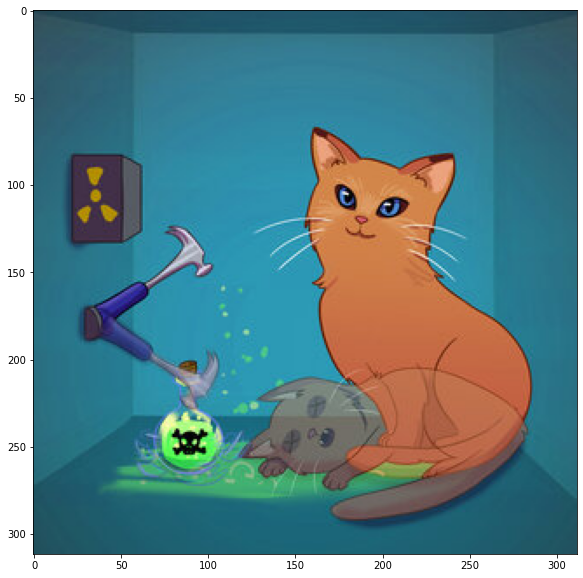

In [16]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img)
plt.show()

### 2. Зашумить изображение аддитивным шумом с вероятностью 0,13.
- вход: изображение из пункта 1
- вывод: зашумленное изображение

In [17]:
img_2 = np.array(img, copy=True)
for i in range(len(img)):
    for j in range(len(img[0])):
        p = randint(0,100)
        if p < 13:
            img_2[i][j] = img_2[i][j] + randint(0, 255-max(img_2[i][j]))

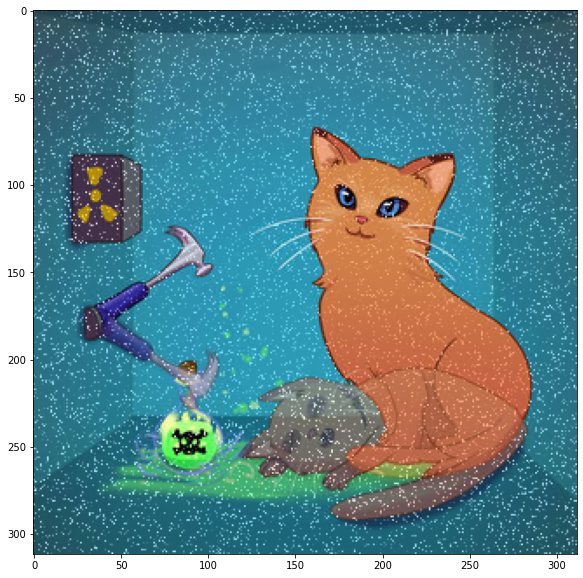

In [18]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img_2)
plt.show()

### 3. Написать функцию реализации ранговой фильтрации
Функцию вида *fun(Image, window, rank)*, где *window* - окно фильтрации (по вариантам), *rank* - опциональный параметр, значение ранга в ранговой фильрации.

In [27]:
def Rank_Filter(img, window, rank):
    r,g,b = img[:,:,0], img[:,:,1],img[:,:,2]
    r_copy, g_copy, b_copy = np.array(r,copy=True),np.array(g,copy=True),np.array(b,copy=True)
    l = len(window)
    step = int((l+1)/2-1)
    for i in range(step, len(img)-step):
        for j in range(step, len(img[0]) - step):
            order_r = []
            order_g = []
            order_b = []
            wx = -1  
            for x in range(i-step, i+step+1):
                wx+=1
                wy = -1
                for y in range(j-step, j+step+1):
                    wy+=1
                    for times in range(window[wx][wy]):
                        order_r.append(r[x][y])
                        order_g.append(g[x][y])
                        order_b.append(b[x][y])
            order_r.sort()
            order_b.sort()
            order_g.sort()
            r_copy[i][j] = order_r[rank]
            g_copy[i][j] = order_g[rank]
            b_copy[i][j] = order_b[rank]
    return np.dstack((r_copy,g_copy,b_copy))       

#### 4. Отфильтровать зашумленное изображение со всеми возможными рангами (кол-во рангов зависит от окна по вариантам).
Подсчитать СКО для результата фильтрации с каждым рангом.
- вход: изображение из пункта 2
- вывод: значение СКО для каждого ранга. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованые изображения для первого, последнего ранга, а так же для ранга с наименьшим СКО.
- СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

In [21]:
def mean_sq_disp (img_0, img_1):
    square_sum = np.sum((img_1 - img_0)**2)
    count = img_1.size
    mse = np.sqrt(square_sum / count)
    return mse       

In [25]:
my_window = [[1,2,1],[2,1,2],[1,2,1]]

In [30]:
def Ranks(img, my_window, orig):
    min_disp = 1000
    min_rank = 0
    total = 0
    for L in my_window:
        for i in L:
            total+=i
    for rank in range(total):
        ranked_img = Rank_Filter(img, my_window, rank)
        disp = mean_sq_disp(orig, ranked_img)
        print(f'for {rank} rank: SKO = {disp}')
        if disp < min_disp:
            min_disp = disp
            min_img = ranked_img
            min_rank = rank
        if rank == 0:
            first_img = ranked_img    
        
    return (first_img, min_img, ranked_img, min_rank, total)

In [31]:
first_rank, min_SKO, last_rank, min_rank, max_rank = Ranks(img_2, my_window, img)

for 0 rank: SKO = 5.082882655354138
for 1 rank: SKO = 4.74643668899139
for 2 rank: SKO = 4.462665409910904
for 3 rank: SKO = 4.122189470816622
for 4 rank: SKO = 3.702762420109676
for 5 rank: SKO = 3.658732581300297
for 6 rank: SKO = 3.650709029630076
for 7 rank: SKO = 4.09122531634303
for 8 rank: SKO = 4.635905235981639
for 9 rank: SKO = 5.519731741660134
for 10 rank: SKO = 6.6160391186365715
for 11 rank: SKO = 8.008267723673743
for 12 rank: SKO = 9.08012914792384


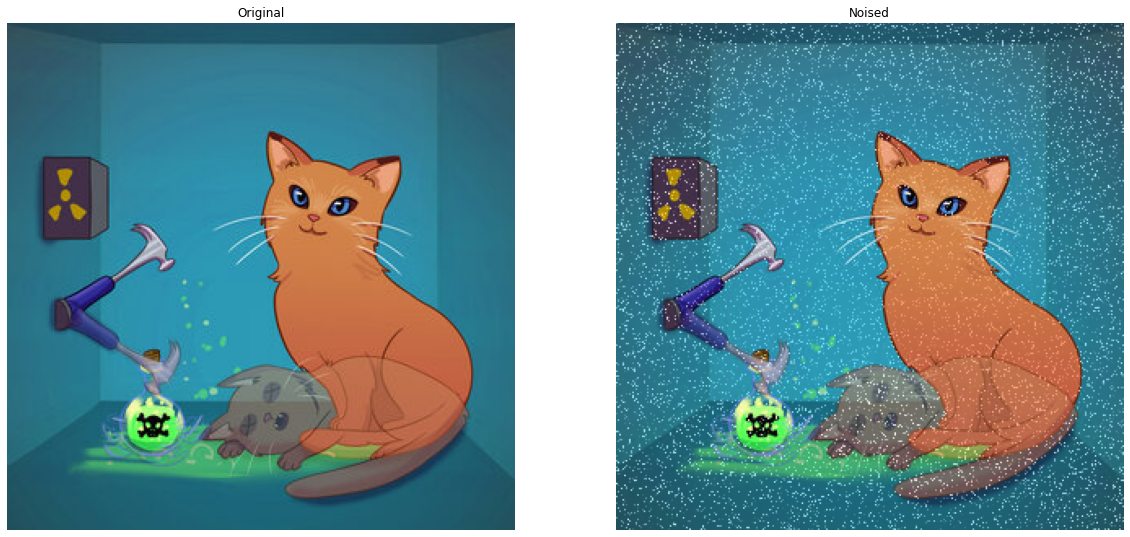

In [42]:
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Noised")
plt.imshow(img_2)

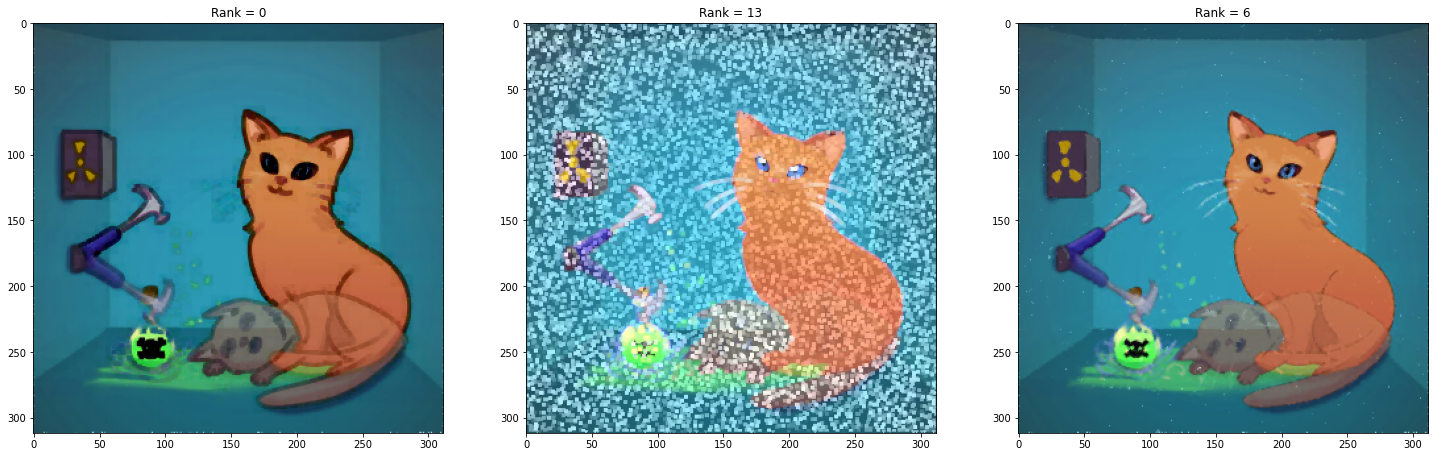

In [43]:
plt.figure(figsize=(25,25))

plt.subplot(2, 3, 1)
plt.title("Rank = 0")
plt.imshow(first_rank)

plt.subplot(2, 3, 2)
plt.title(f"Rank = {max_rank}")
plt.imshow(last_rank)

plt.subplot(2, 3, 3)
plt.title(f"Rank = {min_rank}")
plt.imshow(min_SKO)
plt.show()

### 5. Написать функцию реализации свертки.
Функцию вида *fun(mat1, mat2)*, где *mat1* - первый сигнал, в данном случае изображение. *mat2* - второй сигнал. В данном случае ядро КИХ фильтра.

In [11]:
def convolution(img, kernel):
    r,g,b = img[:,:,0], img[:,:,1],img[:,:,2]
    r_copy, g_copy, b_copy = np.array(r,copy=True),np.array(g,copy=True),np.array(b,copy=True)
    l = len(kernel)
    step = int((l+1)/2-1)
    for i in range(step, len(img)-step):
        for j in range(step, len(img[0])-step):
            window_red = []
            window_green = []
            window_blue = []
            for x in range(i-step, i+step+1):
                window_red.append([])
                window_green.append([])
                window_blue.append([])
                for y in range(j-step, j+step+1):
                    window_red[-1].append(r[x][y])
                    window_green[-1].append(g[x][y])
                    window_blue[-1].append(b[x][y])
            r_copy[i][j] = sum(sum(np.array(window_red)*kernel))   
            g_copy[i][j] = sum(sum(np.array(window_green)*kernel))
            b_copy[i][j] = sum(sum(np.array(window_blue)*kernel))

    return np.dstack((r_copy,g_copy,b_copy))

### 6. Отфильтровать изображение КИХ фильтром с ядром заданным по вариантам. Подсчитать СКО. Сравнить с результатами пункта 4.
- вход: изображение из пункта 2
- вывод: значение СКО. Исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение.
- СКО считать между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

my kernel:
$$ 1/7 \begin{pmatrix} 0&1&0 \\ 1&3&1 \\ 0&1&0 \end{pmatrix} $$

In [19]:
kernel = [[0,1,0],[1,3,1],[0,1,0]]
kernel = np.array(kernel)/7
img_6 = convolution(img_2,kernel)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x157711a7580>)

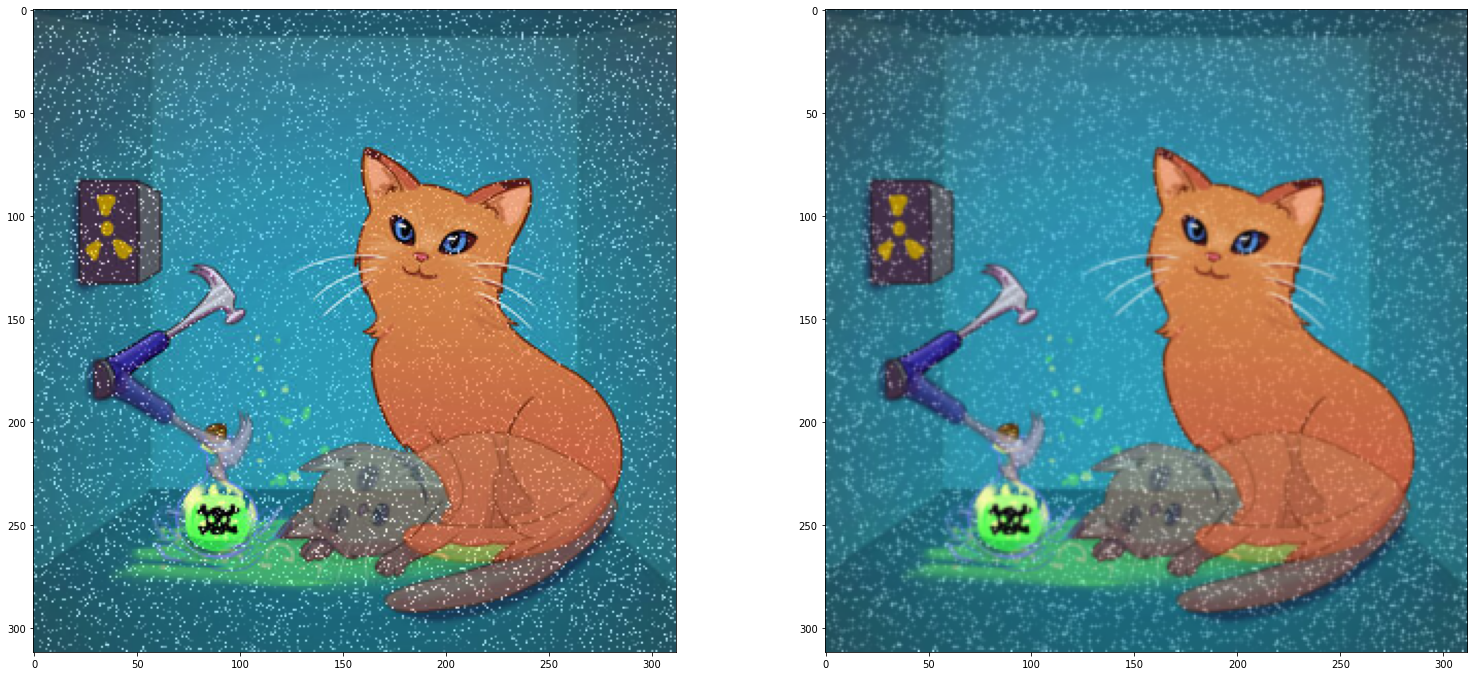

In [20]:
plt.figure(figsize=(26,26))
plt.subplot(221),plt.imshow(img_2)
plt.subplot(222),plt.imshow(img_6)

In [22]:
mean_sq_disp(img_6, img)

6.5062968391445235